In [184]:
# show that enlarging ML search space potentially gives improved results

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score as f1
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectPercentile, chi2

import warnings
warnings.simplefilter('ignore')

In [253]:
# adding a data preprocessing component (scaling) 

i = 6
train_path = './02-feature-extract-ori/features/ft_' + str(i) + '_train.csv'
test_path = './02-feature-extract-ori/features/ft_' + str(i) + '_test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
        
X_train = np.array(df_train.drop(['label'], axis=1).values.tolist())
y_train = np.array(df_train['label'].values.tolist())
X_test = np.array(df_test.drop(['label'], axis=1).values.tolist())
y_test = np.array(df_test['label'].values.tolist())
print("data_" + str(i), "training data size:", len(y_train), "test data size:", len(y_test))

cur_value = 0
train_score = []
test_score = []
x = []
while cur_value <= 50:
    pipe = Pipeline([
          ('scaler', RobustScaler(quantile_range = (cur_value, 100-cur_value))),
          ('classification', RandomForestClassifier(random_state=11))
        ])
    
    x.append(cur_value)
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    train_score.append(f1(y_train, y_train_pred) * 100)
    test_score.append(f1(y_test, y_test_pred) * 100)
    
    cur_value += 2
    

print(train_score)
print(test_score)

data_6 training data size: 9167 test data size: 2293
[95.77308120133482, 95.7683741648107, 95.71508069003895, 95.77308120133482, 95.71508069003895, 95.71508069003895, 95.77308120133482, 95.71508069003895, 95.71508069003895, 95.82637729549249, 95.71508069003895, 95.71508069003895, 95.71508069003895, 95.77308120133482, 95.71508069003895, 95.77308120133482, 95.71508069003895, 95.77308120133482, 95.71508069003895, 95.77308120133482, 95.71508069003895, 95.71508069003895, 95.71508069003895, 95.77308120133482, 95.77308120133482]
[54.59459459459459, 54.74254742547425, 54.74254742547425, 55.525606469002696, 54.98652291105122, 54.74254742547425, 54.98652291105122, 54.74254742547425, 55.13513513513514, 55.525606469002696, 55.525606469002696, 55.13513513513514, 55.37634408602151, 54.98652291105122, 54.74254742547425, 55.13513513513514, 55.13513513513514, 55.37634408602151, 55.37634408602151, 55.76407506702412, 55.13513513513514, 55.525606469002696, 54.74254742547425, 54.74254742547425, 54.74254742

In [249]:
sorted(test_score)
print(((55.76407506702412 - 54.59459459459459)))

1.1694804724295338


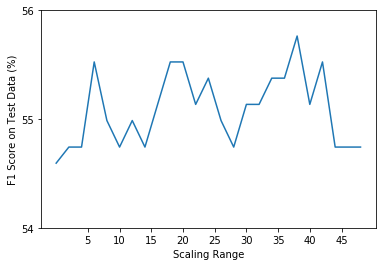

In [254]:
import matplotlib.pyplot as plt
plt.plot(x, test_score)
plt.ylabel('F1 Score on Test Data (%)')
plt.xlabel('Scaling Range')
plt.ylim([54, 56])
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.yticks([54, 55, 56])
plt.savefig('data.pdf')
plt.show()

In [235]:
# adding a feature selection component

i = 8
train_path = './02-feature-extract-ori/features/ft_' + str(i) + '_train.csv'
test_path = './02-feature-extract-ori/features/ft_' + str(i) + '_test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
        
X_train = np.array(df_train.drop(['label'], axis=1).values.tolist())
y_train = np.array(df_train['label'].values.tolist())
X_test = np.array(df_test.drop(['label'], axis=1).values.tolist())
y_test = np.array(df_test['label'].values.tolist())
print("data_" + str(i), "training data size:", len(y_train), "test data size:", len(y_test))

# X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train, y_train, train_size = 0.75, random_state = 42)
# print(len(X_train_train), len(X_valid), len(X_test))

cur_per = 5
train_score = []
test_score = []
x = []
while cur_per <= 100:
    pipe = Pipeline([
          ('feature_selection', SelectPercentile(percentile=cur_per)),
          ('classification', RandomForestClassifier(random_state=11))
        ])
    pipe.fit(X_train, y_train)

    x.append(cur_per * 0.72)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    train_score.append(f1(y_train, y_train_pred)*100)
    test_score.append(f1(y_test, y_test_pred)*100)
    
    cur_per += 5

print(train_score)
print(test_score)

data_8 training data size: 7659 test data size: 1916
[89.83050847457628, 94.48319594166138, 94.59631277813097, 95.448798988622, 95.90422180214242, 95.49778059606848, 96.4824120603015, 96.53870358716173, 96.1006289308176, 96.1755485893417, 95.75680810639645, 96.80250783699059, 96.54305468258956, 96.47355163727958, 96.15626969124135, 96.22641509433963, 96.81050656660413, 96.5473948524796, 96.28229363579081, 96.21689785624211]
[45.29411764705882, 48.80952380952381, 50.617283950617285, 53.53846153846153, 58.1039755351682, 59.2814371257485, 57.05521472392638, 54.20560747663552, 55.06329113924051, 57.14285714285715, 57.05521472392638, 52.06349206349207, 57.3170731707317, 52.5, 55.10835913312694, 54.93827160493827, 52.5, 51.28205128205128, 53.987730061349694, 52.5]


In [236]:
 ((59.2814371257485 - 45.29411764705882))

13.987319478689685

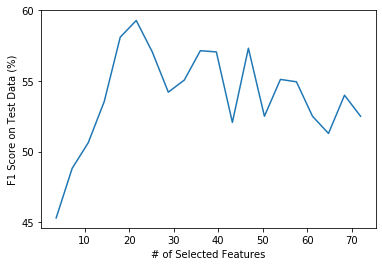

In [237]:
import matplotlib.pyplot as plt
plt.plot(x, test_score)
plt.yticks([45, 50, 55, 60])
plt.ylabel('F1 Score on Test Data (%)')
plt.xlabel('# of Selected Features')
plt.savefig('feature.pdf')
plt.show()

In [238]:
# tune parameters for RF

i = 8
train_path = './02-feature-extract-ori/features/ft_' + str(i) + '_train.csv'
test_path = './02-feature-extract-ori/features/ft_' + str(i) + '_test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
        
X_train = np.array(df_train.drop(['label'], axis=1).values.tolist())
y_train = np.array(df_train['label'].values.tolist())
X_test = np.array(df_test.drop(['label'], axis=1).values.tolist())
y_test = np.array(df_test['label'].values.tolist())
print("data_" + str(i), "training data size:", len(y_train), "test data size:", len(y_test))

# X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train, y_train, train_size = 0.75, random_state = 42)
# print(len(X_train_train), len(X_valid), len(X_test))

train_score = []
test_score = []
p = 5
x = []
while p <= 73:
    pipe = RandomForestClassifier(random_state=42, max_features = p)
    pipe.fit(X_train, y_train)

    x.append(p)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    train_score.append(f1(y_train, y_train_pred)*100)
    test_score.append(f1(y_test, y_test_pred)*100)
    p += 5

print(train_score)
print(test_score)

data_8 training data size: 7659 test data size: 1916
[97.3175296319401, 97.06066291432145, 97.1892567145534, 96.53870358716173, 96.61229611041405, 96.60804020100502, 97.125, 97.12140175219024, 96.73366834170855, 97.37827715355805, 97.0, 96.61229611041405, 96.93174702567313, 97.57311761045425]
[49.67320261437908, 54.93827160493827, 54.60317460317461, 55.172413793103445, 56.875, 59.75609756097562, 55.9748427672956, 55.855855855855864, 56.61538461538461, 54.878048780487795, 54.20560747663552, 55.06329113924051, 56.09756097560975, 57.49235474006117]


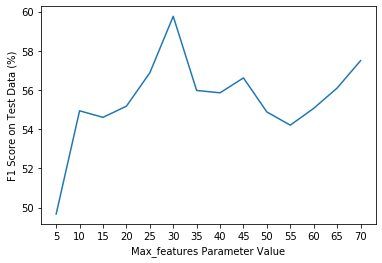

In [239]:
import matplotlib.pyplot as plt
plt.plot(x, test_score)
plt.xticks(x)
plt.ylabel('F1 Score on Test Data (%)')
plt.xlabel('Max_features Parameter Value')
plt.savefig('rf.pdf')
plt.show()

In [127]:
X_train.shape

(7659, 73)

In [234]:
((59.75609756097562 - 49.67320261437908))

10.08289494659654